In [14]:
using FileIO, JLD2
using DifferentialEquations
using Random

In [15]:
include("solvers.jl")
include("useful_functions.jl")
include("plot_functions.jl")


PlotPipPlot (generic function with 1 method)

In [16]:
# initial conditions
x = [-7; 
     -7; 
     15]
x2 = [20; 
      -15; 
      3]
θ = 10; μ = 28; β = 8/3
p = [θ μ β]
t = 80
Δt = 0.0002 #as small as smallest dt we tested with

0.0002

In [152]:
function P1(t)
    μ = 19 + 10^(-2.5)*t^2
    if μ < 28
        return [θ, μ + sin(t), β]
    else
        return [θ, 28, β]
    end
end
function P2(t)
    return [θ, 19+5*sin(2*pi*t), β]
end

P2 (generic function with 1 method)

In [153]:
function P3(t)
    return [θ, 19+5*sin(t)+10^(4)*rand(-1:0.1:1)*Δt, β]
end

P3 (generic function with 1 method)

In [154]:
X1 = LorenzSolutionFixedTimeStep(P2, Δt, Integer(t/Δt), x, RK4) 
#X2 = LorenzSolutionFixedTimeStep(P2, Δt, Integer(t/Δt), x, RK4) 

3×400001 Matrix{Float64}:
 -7.0  -7.0      -7.00002  -7.00004  …  3.97077  3.97484  3.97891  3.98299
 -7.0  -7.00421  -7.00842  -7.01264     6.00175  6.00932  6.0169   6.0245
 15.0  15.0018   15.0036   15.0054      7.94739  7.94793  7.94847  7.94902

In [155]:
Integer(t/Δt)

400000

In [156]:
#PlotTrajectories([X2[:,200000:end]])
#savefig("increase_mu_with_t_squared.png")

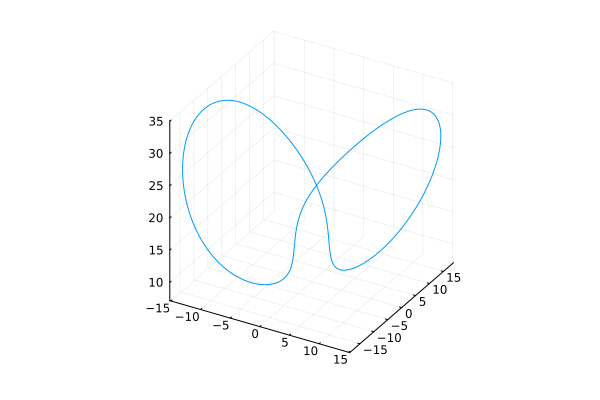

In [157]:
PlotTrajectories([X1[:,200000:end]])
#savefig("perturbed_ellipse_vs_nonperturbed_ellipse.png")